In [29]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, distinct

In [32]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [33]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [34]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [35]:
# Check the engine is correct
print(engine.url)

sqlite:///Resources/hawaii.sqlite


In [36]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [37]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [58]:
# Display the first few rows of data in Station
rows = session.query(Station).limit(5).all()
for row in rows:
    display(row.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c02766dd80>,
 'latitude': 21.2716,
 'id': 1,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c02766ec20>,
 'latitude': 21.4234,
 'id': 2,
 'station': 'USC00513117',
 'elevation': 14.6,
 'name': 'KANEOHE 838.1, HI US',
 'longitude': -157.8015}

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c02766e560>,
 'latitude': 21.5213,
 'id': 3,
 'station': 'USC00514830',
 'elevation': 7.0,
 'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 'longitude': -157.8374}

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c02766e4a0>,
 'latitude': 21.3934,
 'id': 4,
 'station': 'USC00517948',
 'elevation': 11.9,
 'name': 'PEARL CITY, HI US',
 'longitude': -157.9751}

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c02766e680>,
 'latitude': 21.4992,
 'id': 5,
 'station': 'USC00518838',
 'elevation': 306.6,
 'name': 'UPPER WAHIAWA 874.3, HI US',
 'longitude': -158.0111}

In [59]:
# Display the first few rows of data in Measurement
rows = session.query(Measurement).limit(5)
for row in rows:
    display(row.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c027384220>,
 'id': 1,
 'prcp': 0.08,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01'}

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c02766e560>,
 'id': 2,
 'prcp': 0.0,
 'tobs': 63.0,
 'station': 'USC00519397',
 'date': '2010-01-02'}

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c02766e4a0>,
 'id': 3,
 'prcp': 0.0,
 'tobs': 74.0,
 'station': 'USC00519397',
 'date': '2010-01-03'}

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c02766e380>,
 'id': 4,
 'prcp': 0.0,
 'tobs': 76.0,
 'station': 'USC00519397',
 'date': '2010-01-04'}

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c027994c40>,
 'id': 5,
 'prcp': None,
 'tobs': 73.0,
 'station': 'USC00519397',
 'date': '2010-01-06'}

# Exploratory Precipitation Analysis

In [40]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

2016-08-23


,date,precipitation
0,2016-08-23,2.71
1,2016-08-24,9.33
2,2016-08-25,0.54
3,2016-08-26,0.10
4,2016-08-27,0.32
...,...,...
361,2017-08-19,0.09
362,2017-08-20,0.01
363,2017-08-21,0.58
364,2017-08-22,0.50


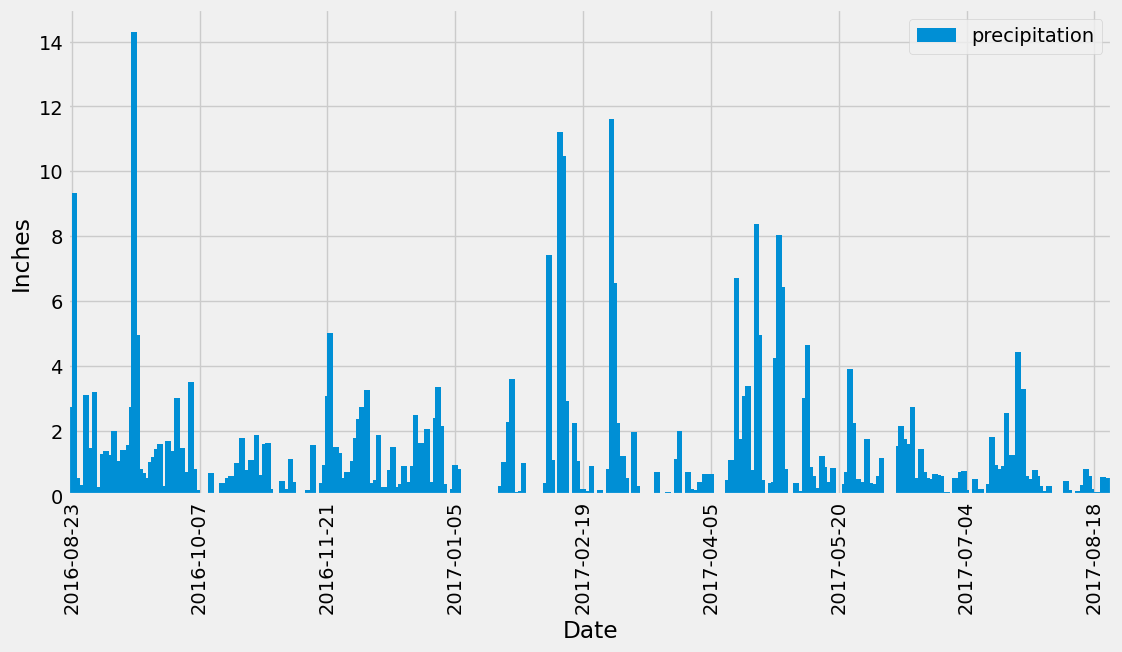

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(start_date)

# Perform a query to retrieve the data and precipitation scores
year_data = (
    session.query(Measurement.date, func.sum(Measurement.prcp))
    .group_by(Measurement.date)
    .filter(Measurement.date >= start_date)
    .all()
)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(year_data, columns=["date", "precipitation"])

# Sort the dataframe by date
df = df.sort_values("date")
display(df)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar(
    figsize=(12, 6),
    width = 2,
    xlabel = "Date",
    ylabel = "Inches"
)

# Define x ticks
xtick_locations = np.arange(0, len(df), 45) # Array from 0 to last index of Dataframe, stepped by 45
xtick_labels = [] # Array to hold dates corresponding to the values in above array
for i in xtick_locations:
    xtick_labels.append(df["date"][i])

plt.xticks(
    ticks = xtick_locations,
    labels = xtick_labels,
    minor = False
)

plt.show()

In [52]:
# Use Pandas to calculate the summary statistics for the precipitation data
df["precipitation"].describe()

count    359.000000
mean       0.044819
std        0.188810
min        0.000000
25%        0.000000
50%        0.000000
75%        0.020000
max        2.620000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Measurement.station.distinct())).scalar()

9

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
(
    session.query(Measurement.station, func.count(Measurement.date))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.prcp).desc())
    .all()
)

[('USC00519281', 2772),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
(
    session.query(*sel)
    .filter(Measurement.station == "USC00519281")
    .all()
)

[(54.0, 85.0, 71.66378066378067)]

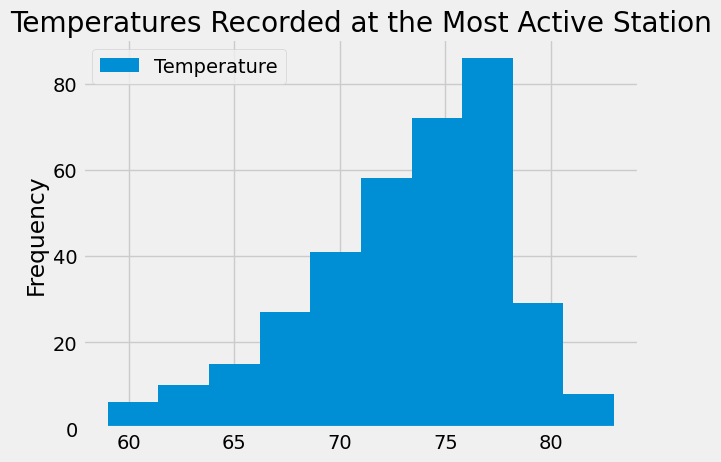

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_data = (
    session.query(Measurement.tobs)
    .filter(Measurement.station == "USC00519281")
    .filter(Measurement.date >= start_date)
    .all()
)

df = pd.DataFrame(active_station_data, columns=["Temperature"])

df.plot.hist(
    title = "Temperatures Recorded at the Most Active Station"
)
plt.show()

# Close Session

In [16]:
# Close Session
session.close()